<a href="https://www.kaggle.com/code/devashishguliya/finger-counting-with-ann?scriptVersionId=100842813" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json 
from keras.layers import Dense
from keras import optimizers

Using TensorFlow backend.


In [2]:
train_files = glob.glob("../input/fingers/fingers/train/*.png")
test_files = glob.glob("../input/fingers/fingers/test/*.png")
hand = glob.glob("../input/hand128/hand.jpg")

### Show an image and convert to array

In [3]:
train_files[0]

'../input/fingers/fingers/train/7194c4e9-8e19-496a-9c56-56678d40b67b_4R.png'

In [4]:
hand[0]

'../input/hand128/hand.jpg'

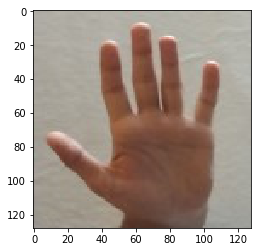

In [5]:
from PIL import Image
im = Image.open('../input/hand128n/photo_2022-07-14_20-45-56.jpg')
plt.imshow(im);

In [6]:
im_array = np.array(im)

In [7]:
im_array.shape

(128, 128, 3)

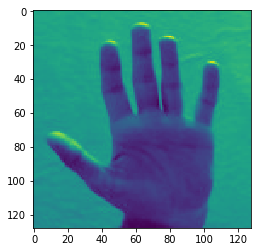

In [8]:
from PIL import Image, ImageOps


# creating an og_image object
og_image = Image.open('../input/hand128n/photo_2022-07-14_20-45-56.jpg')
og_image.show()

# applying grayscale method
gray_image = ImageOps.grayscale(og_image)
gray_image.show()

plt.imshow(gray_image);

In [9]:
im_array = np.array(gray_image)

In [10]:
im_array.shape

(128, 128)

In [11]:
hand_image = np.zeros((1, 128, 128))

In [12]:
hand_image[0, :, :] = np.array(im_array)

In [13]:
hand_image[0][0]

array([175., 173., 171., 170., 169., 169., 169., 168., 166., 168., 170.,
       173., 174., 175., 174., 174., 174., 174., 174., 173., 172., 172.,
       173., 174., 172., 171., 172., 174., 176., 176., 175., 173., 174.,
       175., 175., 175., 175., 174., 173., 172., 175., 176., 177., 177.,
       175., 174., 175., 177., 175., 176., 176., 175., 174., 173., 170.,
       169., 171., 173., 175., 177., 178., 177., 176., 176., 178., 177.,
       176., 175., 177., 177., 177., 176., 178., 178., 176., 176., 177.,
       179., 181., 183., 184., 182., 180., 177., 176., 176., 178., 179.,
       178., 178., 178., 179., 180., 179., 177., 176., 178., 178., 178.,
       178., 180., 181., 182., 183., 183., 183., 181., 179., 177., 178.,
       180., 181., 181., 181., 181., 181., 182., 183., 184., 185., 187.,
       186., 184., 183., 182., 182., 182., 182.])

In [14]:
hand_image/=255

In [15]:
hand_image[0][127]

array([0.57647059, 0.58431373, 0.59215686, 0.59607843, 0.58823529,
       0.58431373, 0.59215686, 0.59607843, 0.59607843, 0.58039216,
       0.57254902, 0.57647059, 0.57647059, 0.56862745, 0.57647059,
       0.59607843, 0.59607843, 0.60392157, 0.61568627, 0.62352941,
       0.62352941, 0.61176471, 0.59607843, 0.58823529, 0.56862745,
       0.57254902, 0.58039216, 0.58431373, 0.58431373, 0.58431373,
       0.58823529, 0.58823529, 0.6       , 0.58823529, 0.57647059,
       0.57254902, 0.58823529, 0.6       , 0.60784314, 0.60784314,
       0.6       , 0.61176471, 0.61960784, 0.62352941, 0.62352941,
       0.60784314, 0.59215686, 0.58431373, 0.56470588, 0.56078431,
       0.49019608, 0.37254902, 0.28235294, 0.24705882, 0.25490196,
       0.24313725, 0.23137255, 0.21960784, 0.21568627, 0.21960784,
       0.22745098, 0.23529412, 0.22745098, 0.21960784, 0.21960784,
       0.21960784, 0.21960784, 0.21960784, 0.21960784, 0.22352941,
       0.22352941, 0.21960784, 0.23137255, 0.23529412, 0.23529

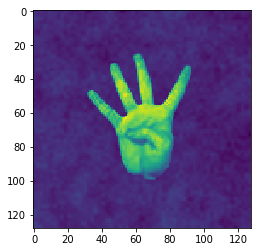

In [16]:
from PIL import Image
im = Image.open(train_files[0])
plt.imshow(im);

In [17]:
im_array = np.array(im)

In [18]:
im_array.shape

(128, 128)

### Load train and test data

In [19]:
X_train = np.zeros((len(train_files), 128, 128))
Y_train = np.zeros((len(train_files), 6 ))
Y_train_true_label = np.zeros((len(train_files), 1))

In [20]:
for i, trf in enumerate(train_files):
    im = Image.open(trf)
    X_train[i, :, :] = np.array(im)
    z = int(trf[-6])
    Y_train_true_label[i] = z
    Y_train[i][z] = 1

In [21]:
print(X_train[0][0])

[58. 56. 54. 54. 54. 53. 49. 48. 51. 53. 55. 54. 51. 49. 48. 47. 47. 49.
 53. 52. 48. 45. 43. 42. 43. 43. 43. 45. 49. 47. 40. 35. 31. 32. 40. 43.
 43. 44. 46. 48. 51. 50. 47. 51. 60. 61. 56. 51. 48. 44. 39. 33. 28. 30.
 38. 42. 43. 46. 51. 49. 42. 40. 43. 46. 50. 52. 54. 54. 53. 51. 50. 47.
 43. 43. 48. 53. 58. 61. 61. 61. 62. 60. 56. 55. 58. 60. 63. 62. 57. 55.
 56. 53. 46. 45. 48. 48. 46. 46. 47. 47. 45. 43. 40. 36. 32. 35. 47. 51.
 48. 44. 41. 40. 42. 44. 45. 44. 41. 42. 47. 47. 42. 43. 48. 49. 45. 44.
 45. 46.]


In [22]:
X_train /= 255
print(X_train[0][0])

[0.22745098 0.21960784 0.21176471 0.21176471 0.21176471 0.20784314
 0.19215686 0.18823529 0.2        0.20784314 0.21568627 0.21176471
 0.2        0.19215686 0.18823529 0.18431373 0.18431373 0.19215686
 0.20784314 0.20392157 0.18823529 0.17647059 0.16862745 0.16470588
 0.16862745 0.16862745 0.16862745 0.17647059 0.19215686 0.18431373
 0.15686275 0.1372549  0.12156863 0.1254902  0.15686275 0.16862745
 0.16862745 0.17254902 0.18039216 0.18823529 0.2        0.19607843
 0.18431373 0.2        0.23529412 0.23921569 0.21960784 0.2
 0.18823529 0.17254902 0.15294118 0.12941176 0.10980392 0.11764706
 0.14901961 0.16470588 0.16862745 0.18039216 0.2        0.19215686
 0.16470588 0.15686275 0.16862745 0.18039216 0.19607843 0.20392157
 0.21176471 0.21176471 0.20784314 0.2        0.19607843 0.18431373
 0.16862745 0.16862745 0.18823529 0.20784314 0.22745098 0.23921569
 0.23921569 0.23921569 0.24313725 0.23529412 0.21960784 0.21568627
 0.22745098 0.23529412 0.24705882 0.24313725 0.22352941 0.21568627
 0

[0. 0. 0. 0. 1. 0.]


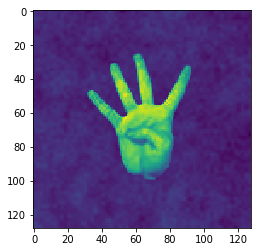

In [23]:
print(Y_train[0])
from PIL import Image
im = Image.open(train_files[0])
plt.imshow(im);

In [24]:
X_test = np.zeros((len(test_files), 128, 128))
Y_test = np.zeros((len(test_files), 6))
Y_test_true_label = np.zeros((len(test_files), 1))

In [25]:
test_files[0]

'../input/fingers/fingers/test/ef512789-23fb-4da6-ad2e-38780d9cd914_1L.png'

In [26]:
for i,tsf in enumerate(test_files):
    im = Image.open(tsf)
    X_test[i, :, :] = np.array(im)
    z = int(tsf[-6])
    Y_test_true_label[i] = z
    Y_test[i][z] = 1

In [27]:
print(X_test[0][0])

[67. 66. 64. 65. 67. 66. 64. 64. 66. 64. 59. 57. 57. 59. 59. 61. 62. 65.
 69. 72. 72. 72. 72. 72. 72. 72. 72. 68. 62. 61. 62. 62. 61. 63. 67. 68.
 65. 64. 67. 70. 72. 72. 68. 68. 71. 72. 73. 70. 63. 61. 66. 67. 67. 67.
 68. 64. 55. 53. 59. 61. 61. 62. 64. 65. 64. 64. 64. 64. 62. 60. 59. 59.
 59. 58. 56. 51. 44. 42. 45. 47. 48. 46. 40. 38. 43. 47. 49. 52. 56. 57.
 57. 59. 63. 66. 69. 70. 68. 67. 67. 66. 63. 60. 56. 52. 48. 45. 45. 46.
 51. 56. 57. 58. 58. 60. 66. 71. 73. 71. 67. 62. 56. 55. 61. 62. 58. 59.
 64. 66.]


In [28]:
X_test /= 255
print(X_test[0][0])

[0.2627451  0.25882353 0.25098039 0.25490196 0.2627451  0.25882353
 0.25098039 0.25098039 0.25882353 0.25098039 0.23137255 0.22352941
 0.22352941 0.23137255 0.23137255 0.23921569 0.24313725 0.25490196
 0.27058824 0.28235294 0.28235294 0.28235294 0.28235294 0.28235294
 0.28235294 0.28235294 0.28235294 0.26666667 0.24313725 0.23921569
 0.24313725 0.24313725 0.23921569 0.24705882 0.2627451  0.26666667
 0.25490196 0.25098039 0.2627451  0.2745098  0.28235294 0.28235294
 0.26666667 0.26666667 0.27843137 0.28235294 0.28627451 0.2745098
 0.24705882 0.23921569 0.25882353 0.2627451  0.2627451  0.2627451
 0.26666667 0.25098039 0.21568627 0.20784314 0.23137255 0.23921569
 0.23921569 0.24313725 0.25098039 0.25490196 0.25098039 0.25098039
 0.25098039 0.25098039 0.24313725 0.23529412 0.23137255 0.23137255
 0.23137255 0.22745098 0.21960784 0.2        0.17254902 0.16470588
 0.17647059 0.18431373 0.18823529 0.18039216 0.15686275 0.14901961
 0.16862745 0.18431373 0.19215686 0.20392157 0.21960784 0.223529

In [29]:
Y_test[0]

array([0., 1., 0., 0., 0., 0.])

In [30]:
Y_test_true_label[0]

array([1.])

In [31]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 18000
number of test examples = 3600
X_train shape: (18000, 128, 128)
Y_train shape: (18000, 6)
X_test shape: (3600, 128, 128)
Y_test shape: (3600, 6)


In [32]:
X_train_flat = X_train.reshape(18000, 16384)
X_test_flat = X_test.reshape(3600, 16384)
hand_image = hand_image.reshape(1, 16384)

In [33]:
hand_image[0][16383]

0.615686274509804

Visualize data

Label: [0. 0. 0. 0. 1. 0.]


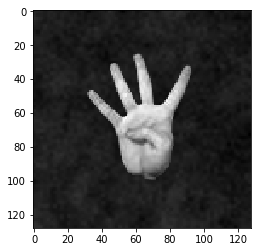

In [34]:
print("Label:",Y_train[0])
plt.imshow(X_train[0].reshape(128,128), cmap='gray')
plt.show()

Designing a model

In [35]:
first_layer_size = 64 
fingers = 6
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(16384,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(fingers, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1048640   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 102       
Total params: 1,052,406
Trainable params: 1,052,406
Non-trainable params: 0
_________________________________________________________________


[[array([[-0.00405829,  0.01751464,  0.00734847, ...,  0.01740251,
        -0.0178947 ,  0.015888  ],
       [ 0.00464404, -0.01614198, -0.00188128, ..., -0.00063084,
         0.00540526, -0.0172347 ],
       [-0.00309607,  0.00112961, -0.01703727, ..., -0.00367686,
        -0.01317675, -0.00810619],
       ...,
       [ 0.01838697, -0.01420897, -0.01303153, ...,  0.0024294 ,
        -0.00807469, -0.000135  ],
       [ 0.01850931,  0.01220532,  0.00957301, ..., -0.00726025,
        -0.01321551, -0.0150879 ],
       [-0.01325613,  0.0015381 , -0.01114317, ...,  0.00512778,
        -0.01593435, -0.00696725]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)], [array([[ 0.03727543, -0.1152904 , -0.12858975, ..., -0.21286517,
 

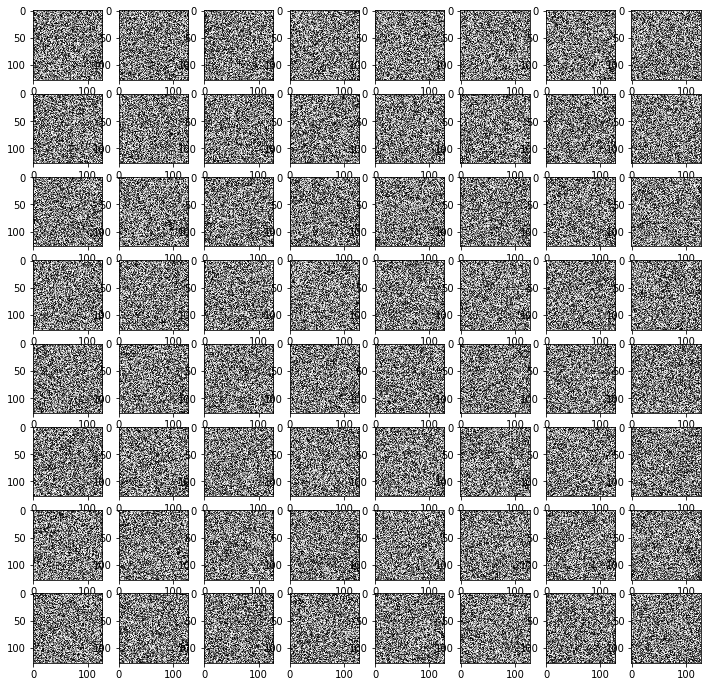

In [36]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)
print(w)
layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(128,128),cmap='gray')
plt.show()

In [37]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
Y_train[0:10]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [39]:
epochs=10
batch_size = 128
history = model.fit(X_train_flat,Y_train_true_label,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
18000/18000 [==============================] - 2s 132us/step - loss: 1.1920 - accuracy: 0.6056
Epoch 2/10
18000/18000 [==============================] - 1s 75us/step - loss: 0.2516 - accuracy: 0.9590
Epoch 3/10
18000/18000 [==============================] - 1s 76us/step - loss: 0.0604 - accuracy: 0.9887
Epoch 4/10
18000/18000 [==============================] - 1s 78us/step - loss: 0.0230 - accuracy: 0.9961
Epoch 5/10
18000/18000 [==============================] - 1s 76us/step - loss: 0.0184 - accuracy: 0.9964
Epoch 6/10
18000/18000 [==============================] - 2s 99us/step - loss: 0.0175 - accuracy: 0.9953
Epoch 7/10
18000/18000 [==============================] - 1s 80us/step - loss: 0.0387 - accuracy: 0.9901
Epoch 8/10
18000/18000 [==============================] - 1s 76us/step - loss: 0.0111 - accuracy: 0.9974
Epoch 9/10
18000/18000 [==============================] - 1s 76us/step - loss: 0.0028 - accuracy: 0.9996
Epoch 10/10
18000/18000 [=============================

In [40]:
score = model.evaluate(X_test_flat, Y_test_true_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.014866346257428328
Test accuracy: 0.9963889122009277


Shape of First Layer (16384, 64)
Visualization of First Layer


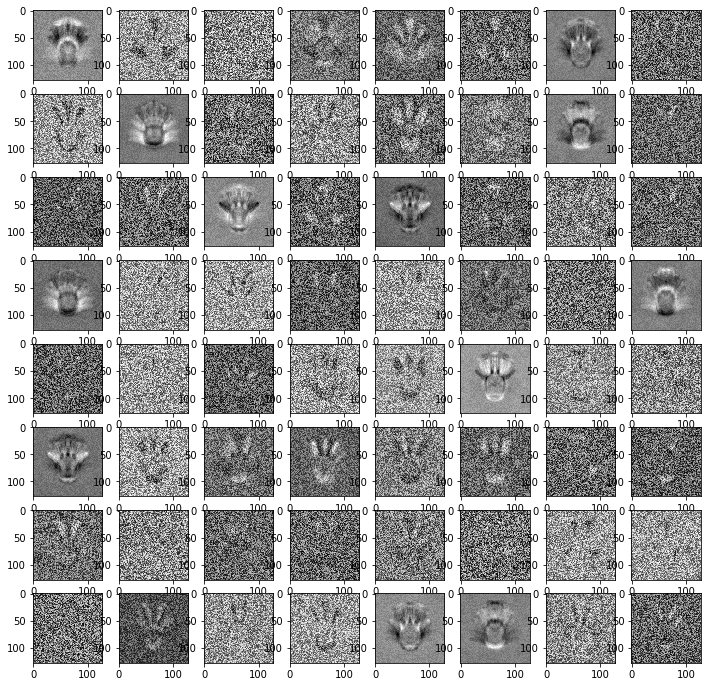

In [41]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(128,128),cmap='gray')
plt.show()

In [42]:
prediction = model.predict(X_test_flat)
y_prediction = prediction[6]
print('Prediction\n',y_prediction)
print('\nThresholded output\n',(y_prediction>0.5)*1)

Prediction
 [2.9544410e-04 5.6602353e-06 4.8776486e-04 2.5052678e-09 9.9921107e-01
 1.2221569e-11]

Thresholded output
 [0 0 0 0 1 0]


4


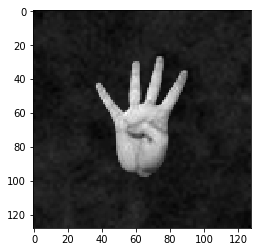

In [43]:
print(np.argmax(y_prediction))
plt.imshow(X_test[6].reshape(128,128),cmap='gray')
plt.show()

1


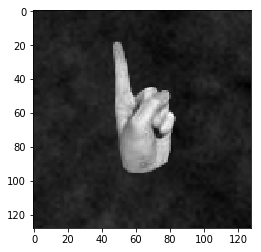

In [44]:
print(np.argmax(prediction[8]))
plt.imshow(X_test[8].reshape(128,128),cmap='gray')
plt.show()

2


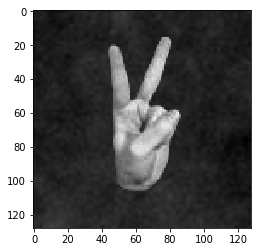

In [45]:
print(np.argmax(prediction[2000]))
plt.imshow(X_test[2000].reshape(128,128),cmap='gray')
plt.show()

In [46]:
hand_prediction = model.predict(hand_image)

In [47]:
print(hand_prediction)

[[9.3684328e-01 6.3500861e-03 3.1070362e-04 1.0539744e-11 5.6495804e-02
  2.0729888e-07]]


0


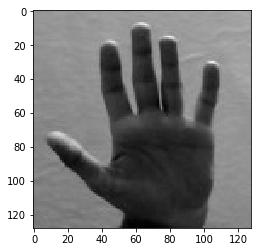

In [48]:
print(np.argmax(hand_prediction))
plt.imshow(hand_image[0].reshape(128,128),cmap='gray')
plt.show()

In [49]:
y_predicted_labels = [np.argmax(i) for i in prediction]

In [50]:
y_predicted_labels[:20]

[1, 0, 0, 3, 4, 1, 4, 3, 1, 4, 4, 4, 1, 1, 1, 5, 3, 5, 5, 2]

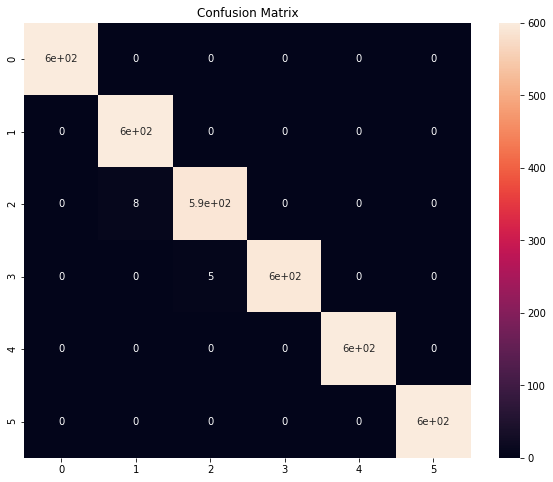

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(Y_test_true_label, y_predicted_labels)
plt.figure(figsize = (10,8))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_predicted_labels)), yticklabels = sorted(set(y_predicted_labels)))
plt.title('Confusion Matrix')
plt.show()